### Linear Regression 
#### Prediciting the student scores based on number of hours studied using simple linear regression model
### Model Used: Linear Regression

In [264]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import plotly.express as px

In [265]:
# Reading data from remote link
url = "http://bit.ly/w-data"
students_data = pd.read_csv(url)
print('Data - Hours and Scores')
print('Independent Variable= Hours')
print('Dependent Variable= Scores')
students_data.head(10)

Data - Hours and Scores
Independent Variable= Hours
Dependent Variable= Scores


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [266]:
print('minimum hours studied',np.min(students_data['Hours']))
print('minimum scores attained',np.min(students_data['Scores']))

minimum hours studied 1.1
minimum scores attained 17


In [267]:
print('maximum hours studied',np.max(students_data['Hours']))
print('maximum scores attained',np.max(students_data['Scores']))

maximum hours studied 9.2
maximum scores attained 95


(0, 10)

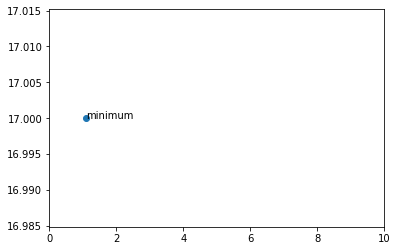

In [268]:
plt.scatter(np.min(students_data['Hours']), np.min(students_data['Scores']))
plt.annotate(s='minimum', xy=(np.min(students_data['Hours']), np.min(students_data['Scores'])))
plt.xlim(0,10)

(0, 10)

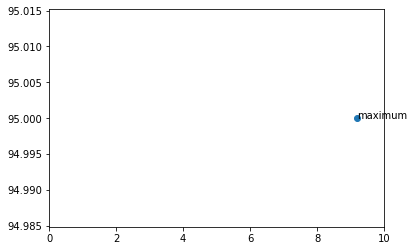

In [269]:
plt.scatter(np.max(students_data['Hours']), np.max(students_data['Scores']))
plt.annotate(s='maximum', xy=(np.max(students_data['Hours']), np.max(students_data['Scores'])))
plt.xlim(0,10)

In [270]:
students_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


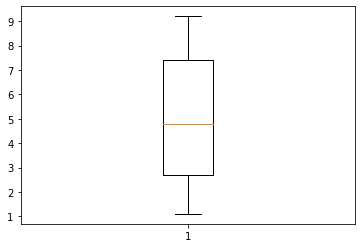

In [271]:
plt.boxplot(students_data['Hours'])
plt.show()

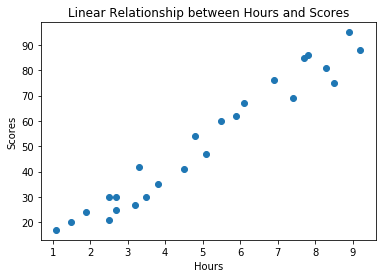

In [272]:
plt.scatter('Hours', 'Scores', data=students_data)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Linear Relationship between Hours and Scores')
plt.show()

#### The plot shows perfect linear relationship between independent and dependent variable

### preparing the data

In [273]:
X=students_data['Hours'].values.reshape(-1,1)
y=students_data['Scores'].values.reshape(-1,1)

In [274]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

### Splitting the data as train and test set

In [275]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=0)

In [276]:
### Training the model

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [277]:
lr.score(X_test, y_test)

0.9454906892105356

In [278]:
ypred=lr.predict(X_test)

In [279]:
lr.coef_

array([[9.91065648]])

In [280]:
lr.intercept_

array([2.01816004])

In [281]:
line=lr.coef_*X+lr.intercept_

### Actual data points and Predicted Regression line plot

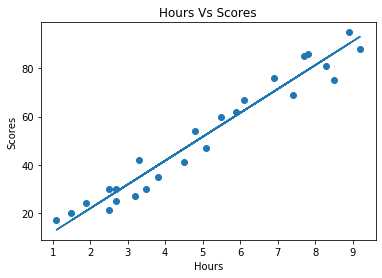

In [282]:
plt.scatter(X, y)
plt.plot(X, line)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours Vs Scores')
plt.show()

In [283]:
print('test data\n',X_test)

test data
 [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [284]:
ypred=lr.predict(X_test)
print('predicted scores for test data\n',ypred)

predicted scores for test data
 [[16.88414476]
 [33.73226078]
 [75.357018  ]
 [26.79480124]
 [60.49103328]]


In [285]:
Actual=y_test.reshape(-1,1)
Actual

array([[20],
       [27],
       [69],
       [30],
       [62]], dtype=int64)

In [286]:
df=pd.concat([pd.DataFrame(X_test, columns=['Hours']),
              pd.DataFrame(Actual, columns=['Actual']), 
              pd.DataFrame(ypred, columns=['Predictions'])], axis=1)
df

,Hours,Actual,Predictions
0,1.5,20,16.884145
1,3.2,27,33.732261
2,7.4,69,75.357018
3,2.5,30,26.794801
4,5.9,62,60.491033


In [287]:
##Loss=summazion of (Actual - predict)

Loss=np.sum([df['Actual']- df['Predictions']])
print('Total loss values= {}'.format(Loss))

Total loss values= -5.2592580603392705


In [288]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,median_absolute_error

### Metrics used to find how well the model fitted for predictions

In [289]:
print('- - - Regression Metrics Prediction - - -')
print('R2Score',r2_score(df['Actual'], lr.predict(X_test)))
print('mean_absolute_error',mean_absolute_error(df['Actual'], lr.predict(X_test)))
print('mean_squared_error',mean_squared_error(df['Actual'], lr.predict(X_test)))
print('median_absolute_error',median_absolute_error(df['Actual'], lr.predict(X_test)))

- - - Regression Metrics Prediction - - -
R2Score 0.9454906892105356
mean_absolute_error 4.183859899002975
mean_squared_error 21.5987693072174
median_absolute_error 3.2051987569597244


In [290]:
hours=9.25
scores=lr.predict(np.array(hours).reshape(-1,1))
print('number of hours studied: {}'.format(hours))
print('predicted scores: {}'.format(scores))

number of hours studied: 9.25
predicted scores: [[93.69173249]]


#### for 9.25 hours, possibiblities of getting scores is 93.69

In [291]:
from sklearn.linear_model import Ridge, Lasso

In [292]:
ridge=Ridge(alpha=3)
lasso=Lasso(alpha=3)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

Lasso(alpha=3, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [293]:
ridge.score(X_test, y_test)

0.9492432358573777

In [294]:
lasso.score(X_test, y_test)

0.951357783797495

In [295]:
ridge.predict(X_test)

array([[17.76270463],
       [34.21147525],
       [74.84961444],
       [27.43845206],
       [60.3359933 ]])

In [296]:
lasso.predict(X_test)

array([18.70014891, 34.72280849, 74.30820277, 28.12524278, 60.17056196])

In [297]:
print('DataFrame of Actual and Ridge/Lasso predictions')
df=pd.concat([pd.DataFrame(X_test, columns=['Hours']),
              pd.DataFrame(Actual, columns=['Actual']),
              pd.DataFrame(ridge.predict(X_test), columns=['Ridge_pred']), 
              pd.DataFrame(lasso.predict(X_test), columns=['Lasso_pred'])], axis=1)
df

DataFrame of Actual and Ridge/Lasso predictions


,Hours,Actual,Ridge_pred,Lasso_pred
0,1.5,20,17.762705,18.700149
1,3.2,27,34.211475,34.722808
2,7.4,69,74.849614,74.308203
3,2.5,30,27.438452,28.125243
4,5.9,62,60.335993,60.170562


D:\AI\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

D:\AI\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



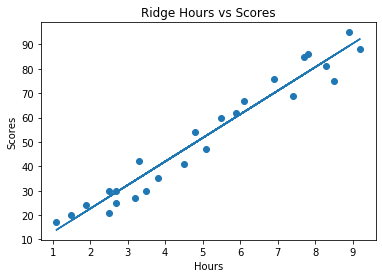

In [298]:
plt.scatter(students_data['Hours'], students_data['Scores'])
plt.plot(students_data['Hours'], (ridge.coef_*X+ridge.intercept_))
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Ridge Hours vs Scores')
plt.show()

In [299]:
print('- - - Ridge Metrics Prediction - - -')
print('R2Score',r2_score(df['Actual'], ridge.predict(X_test)))
print('mean_absolute_error',mean_absolute_error(df['Actual'], ridge.predict(X_test)))
print('mean_squared_error',mean_squared_error(df['Actual'], ridge.predict(X_test)))
print('median_absolute_error',median_absolute_error(df['Actual'], ridge.predict(X_test)))


- - - Ridge Metrics Prediction - - -
R2Score 0.9492432358573777
mean_absolute_error 3.9047879400796406
mean_squared_error 20.111860223872686
median_absolute_error 2.561547942607927


In [300]:
##Loss=summazion of (Actual - predict)

Loss=np.sum([df['Actual']- df['Ridge_pred']])
print('Total loss values= {}'.format(Loss))

Total loss values= -6.5982396814360555


D:\AI\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

D:\AI\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



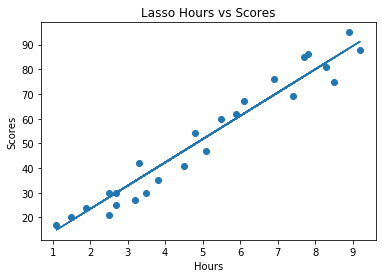

In [301]:
plt.scatter(students_data['Hours'], students_data['Scores'])
plt.plot(students_data['Hours'], (lasso.coef_*X+lasso.intercept_))
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Lasso Hours vs Scores')
plt.show()

In [302]:
print('- - - Lasso Metrics Prediction - - -')
print('R2Score',r2_score(df['Actual'], lasso.predict(X_test)))
print('mean_absolute_error',mean_absolute_error(df['Actual'], lasso.predict(X_test)))
print('mean_squared_error',mean_squared_error(df['Actual'], lasso.predict(X_test)))
print('median_absolute_error',median_absolute_error(df['Actual'], lasso.predict(X_test)))

- - - Lasso Metrics Prediction - - -
R2Score 0.951357783797495
mean_absolute_error 3.6070115240191667
mean_squared_error 19.27399174808057
median_absolute_error 1.8747572186974004


In [303]:
ridge.predict(np.array(hours).reshape(-1,1))
lasso.predict(np.array(hours).reshape(-1,1))

array([91.74462644])

In [309]:
hours=1.25
scores=ridge.predict(np.array(hours).reshape(-1,1))
print('number of hours studied: {}'.format(hours))
print('ridge predicted scores: {}'.format(scores))

number of hours studied: 1.25
ridge predicted scores: [[15.34376778]]


In [304]:
hours=9.25
scores=ridge.predict(np.array(hours).reshape(-1,1))
print('number of hours studied: {}'.format(hours))
print('ridge predicted scores: {}'.format(scores))

number of hours studied: 9.25
ridge predicted scores: [[92.74974717]]


In [310]:
hours=1.25
scores=lasso.predict(np.array(hours).reshape(-1,1))
print('number of hours studied: {}'.format(hours))
print('lasso predicted scores: {}'.format(scores))

number of hours studied: 1.25
lasso predicted scores: [16.34387544]


In [305]:
hours=9.25
scores=lasso.predict(np.array(hours).reshape(-1,1))
print('number of hours studied: {}'.format(hours))
print('lasso predicted scores: {}'.format(scores))

number of hours studied: 9.25
lasso predicted scores: [91.74462644]


In [307]:
##Loss=summazion of (Actual - predict)

Loss=np.sum([df['Actual']- df['Lasso_pred']])
print('Total loss values = {}'.format(Loss))

Total loss values = -8.026964910009077
